# Critical Thinking 2 

## Statistical Distributions

<br>
Course Code: DS560 <br>
Course Name: Advanced Data Mining <br>
CRN: 24539 <br>
Dr. Mohammad Abdelrahman

Student ID: G200007615 <br>
Student Name: Abdulaziz Alqumayzi<br>
Date: 24/02/2021

#### Requirements 
- Colab or Jupyter notebook to run the code.
- Pandas, numpy, math, matplotlib and scipy packages.

## Table of contents:
- [Task-1](#task1)
- [Task-2](#task2)
- [Task-3](#task3)
- [Task-4](#task4)
- [Task-5](#task5)
- [References](#ref)

In [1]:
# importing needed packages
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# loading the Titanic dataset
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<a id='task1'></a>
#### Task-1: 
Python code to clean the data, remove any missing values, then find the mean, median, mode, standard deviation, and variance of each numerical column in the dataset.

In [3]:
# we make a copy if we needed to compare between the original dataset with the modified one  
titanic = df.copy()
# info() function return a brief description on how many columns, rows, data type and non-null values. 
# we have missing values in columns Edge, Cabin, and Embarked
titanic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# The remaining tasks focus on ages and weights. So we will remove rows with null values in Age column.
titanic['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [5]:
# we can see some ages have points because the data type is  float which is wrong values.
# we will round the values and convert it to integer. 

# dropping null values based Age column 
titanic.dropna( subset=['Age'], inplace=True)
# round values up and converting data type from float into integer
titanic['Age'] = np.ceil(titanic['Age']).astype(int)
# ensuring that rows are 714 because we have 714 non null values in Age column 
titanic.shape

(714, 12)

In [6]:
# ensuring that Age values are correct 
titanic['Age'].unique()

array([22, 38, 26, 35, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15, 28,
        8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17, 32,
       16, 25,  1, 30, 33, 23, 24, 46, 59, 71, 37, 47, 12,  9, 51, 56, 41,
       44, 61, 50, 36, 62, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57, 80, 70,
        6, 74])

Now we will do the part two of the task 1 which is finding the mean, median, mode, standard deviation, and variance of each numerical column in the dataset. 

In [7]:
# mean, median,and standard deviation
# describe function very helpful function return many important results; three of them related to our task.
# mean result is clear from its name, std stand for standard deviation, 50% is the median result. 
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.714286,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526453,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.250000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [8]:
# function var used to return the variance 
titanic.var()

PassengerId    67142.927945
Survived           0.241533
Pclass             0.702663
Age              211.017832
SibSp              0.864497
Parch              0.728103
Fare            2800.413100
dtype: float64

In [9]:
# mode function is a little bit confusing, when we apply the mode function to the data frame; 
# it returns the result in the first row. other rows are not important. 

# note that: not all numeric results have a meaning, such as PassengerId. The variable is an identifier and has a unique number.
# Its data type numeric, but it should be string because adding or substracting ID numbers have no meaning.  
# numeric_only method to only return numeric columns 
titanic.mode(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3.0,24.0,0.0,0.0,13.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
709,886,NaN,NaN,NaN,NaN,NaN,NaN
710,887,NaN,NaN,NaN,NaN,NaN,NaN
711,888,NaN,NaN,NaN,NaN,NaN,NaN
712,890,NaN,NaN,NaN,NaN,NaN,NaN


<a id='task2'></a>
#### Task-2: 
As the dataset doesn’t contain the weight of adult passengers who were on the ship, and given the fact that the average weight of adults between ages 20 and 50 is 90kg (with a 50kg variance), write Python code to generate a number of weights equal to the number of records in the dataset using normal distribution that simulates the actual population.

In [10]:
# since we have a fact that the average weight of adults between ages 20 and 50 is 90kg (with a 50kg variance), 
# we will filter the data to include only ages from 20 to 50. 

# filtring the dataset 
filt = (titanic['Age'] >= 20) &  (titanic['Age'] <= 50)
# assign it to a new variable
filtered_ages = titanic.loc[filt]
# check the minimum and maximum in Age column to ensure the data has filtered
filtered_ages['Age'].describe()

count    486.000000
mean      31.872428
std        8.238218
min       20.000000
25%       25.000000
50%       30.000000
75%       38.000000
max       50.000000
Name: Age, dtype: float64

In [11]:
# checking the new shape of the dataset 
filtered_ages.shape

(486, 12)

After we cleaned our dataset and filter it to what we want. <br>
Now we will create a new column for the weights. We will use normal distibution`random.normal()`on weights values.<br>
To create the values we need 3 arguments: <br>
- Mean (already given `90kg`)
- Standard deviation (`50kg`variance that needs to be converted to standard deviation)
- Size (already given `486`) 


In [12]:
# converting the variance value 50kg to standard deviation 
age_std = math.sqrt(50)
print(age_std)

7.0710678118654755


In [13]:
# seed function is used to fix the result that will come from the random function.
np.random.seed(42)
# create Weight column and generate random normal distribution. random.normal function takes mean, standard deviation and size. 
# decimals method to have only one-digit after the point. Because the last task want to find 77.7kg 
filtered_ages['Weight'] = np.random.normal(90, age_std,486).round(decimals=1)

<ipython-input-13-df4bc6e2cb43>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ages['Weight'] = np.random.normal(90, age_std,486).round(decimals=1)


In [14]:
filtered_ages['Weight']

0       93.5
1       89.0
2       94.6
3      100.8
4       88.3
       ...  
884     83.2
885     78.6
886     91.4
889     84.7
890     79.9
Name: Weight, Length: 486, dtype: float64

In [15]:
# checking if there are null values 
filtered_ages['Weight'].isna().sum()

0

In [16]:
filtered_ages['Weight'].describe()

count    486.000000
mean      90.047737
std        6.930859
min       67.100000
25%       85.125000
50%       90.100000
75%       94.500000
max      117.200000
Name: Weight, dtype: float64

**Minimum weight is 67 and maximum is 117**

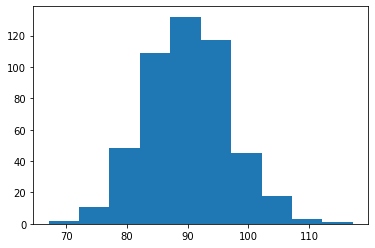

In [17]:
# visualizing the Weight column 
plt.hist(filtered_ages['Weight']);

<a id='task3'></a>
#### Task-3: 
Find the probability of having someone of a weight less than 50kg.

In [18]:
# sorting weights to read values more clearly
# minimum weight is 67 so the result should be zero 
weight_sorted = filtered_ages['Weight'].sort_values()
weight_sorted 

484     67.1
141     71.5
870     73.7
706     75.0
811     75.4
       ...  
403    106.4
221    107.4
339    109.2
881    111.8
392    117.2
Name: Weight, Length: 486, dtype: float64

In [19]:
# calculating the total number of people that has 50 kg divided by the total number of all people
task3_p = len(filtered_ages.query('Weight <= 50')['Weight'])/len(filtered_ages['Weight'])

Since the minimum weight is 67, so the probability of having someone of a weight less than 50 kg is zero. 
> The probability of having someone of a weight less than 50kg is **0/486 = 0**

In [20]:
print(f'The probability of having someone of a weight less than 50kg: {task3_p:.2f}')

The probability of having someone of a weight less than 50kg: 0.00


<a id='task4'></a>
#### Task-4: 
Find the probability of having someone of a weight between 100kg and 120kg.

In [21]:
# first, we must know how many people in this dataset are between 100 kg and 120kg 
# we will filter the dataset again and find the total number of people between 100 kg and 120 kg
filt2 = (filtered_ages['Weight'] >= 100) &  (filtered_ages['Weight'] <= 120)
# assign the values to a new variable
filtered_weight_100_120 = filtered_ages.loc[filt2]
# check the unique values to ensure the data has filtered
filtered_weight_100_120['Weight'].unique()

array([100.8, 101.2, 100.4, 103.1, 100.9, 101.1, 100.5, 103.3, 107.4,
       105.5, 101. , 103.2, 103.4, 100.3, 109.2, 117.2, 106.4, 105.2,
       102.5, 105. , 101.5, 100.2, 105.1, 104.8, 103. , 104.6, 102.4,
       100.6, 103.9, 101.6, 111.8])

In [22]:
# finding the total number of people between 100kg and 120kg 
filtered_weight_100_120.shape

(40, 13)

In [23]:
# another way to find the total number of people between 100kg and 120kg in one line of code 
# query function is helpful 
task4_p = len(filtered_ages.query('Weight >= 100 & Weight <=120')['Weight'])/len(filtered_ages['Weight'])
task4_p

0.0823045267489712

We have 40 people out of 486 people their weights are between 100kg and 120kg

In [24]:
print(f'The probability of having someone of a weight between 100kg and 120kg: {task4_p:.2f}')

The probability of having someone of a weight between 100kg and 120kg: 0.08


<a id='task5'></a>
#### Task-5: 
Find the probability of having someone of a weight that’s exactly 77.7kg.

In [25]:
# use query function to find if there are any people with 77.7kg
task5_p = len(filtered_ages.query('Weight == 77.7')['Weight'])/len(filtered_ages['Weight'])
task5_p

0.0

No one in the dataset that we created has 77.7kg in our seed 42.

> The probability of having someone of a weight that’s exactly 77.7kg is **0/486 = 0**

In [26]:
# Note: this code snippet is not part of the answer to task 5. I'm just checking weights that are near 77.7kg 
# I tried weights between 77.5 and 77.9 and found 4 people. 
len(filtered_ages.query('Weight >= 77.5 & Weight <= 77.9')['Weight'])

4

<a id='ref'></a>
#### References
- Madhavan, S. (2015). Mastering Python for data science explore the world of data science through Python and learn how to make sense of data. Birmingham: Packt Publ.
-Schafer, C. (2020). Python Pandas Tutorial. Retrieved February 07, 2021, from https://www.youtube.com/watch?v=ZyhVh-qRZPA&amp;list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS&amp;index=1&amp;ab_channel=CoreySchafer 
- Yuk, J. (1965, July 01). Rounding up a column. Retrieved February 23, 2021, from https://stackoverflow.com/questions/38893170/rounding-up-a-column
- Pandas dataframe: - mode() function. (2021). Retrieved February 23, 2021, from https://www.w3resource.com/pandas/dataframe/dataframe-mode.php
- Pandas.dataframe.round. (2021). Retrieved February 23, 2021, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.round.html
- Numpy.random.normal. (2021). Retrieved February 23, 2021, from https://numpy.org/doc/1.16/reference/generated/numpy.random.normal.html#numpy.random.normal
- Following distribution gives the weight of 38 students of a class weight in Kg. (2021). Retrieved February 23, 2021, from https://www.topperlearning.com/answer/following-distribution-gives-the-weight-of-38-students-of-a-class-weight-in-kg-31-35-36-40-41-45-46-50-51-55-56-60-61-65-66-70-71-75-no-of-students-9-/yklmb60pp
- 7. input and Output. (2021). Retrieved February 23, 2021, from https://docs.python.org/3/tutorial/inputoutput.html

In [ ]:
# Write Python code to generate a number of weights equal to the number of records in the dataset 
# using normal distribution that simulates the actual population.

weight = pd.DataFrame(dict( Weight=np.random.normal(loc=age_mean,scale=age_std,size=n)))

# Find the probability of having someone of a weight less than 50kg.

norm(loc=weight_mean, scale=weight_std).cdf(49.9)

# Find the probability of having someone of a weight between 100kg and 120kg.

cdf_upper_limit = norm(loc = weight_mean , scale = weight_std).cdf(120)

cdf_lower_limit = norm(loc = weight_mean , scale = weight_std).cdf(100)

prob = cdf_upper_limit - cdf_lower_limit

# Find the probability of having someone of a weight that’s exactly 77.7kg

norm(loc = weight_mean , scale = weight_std).pdf(77.7)